<h1 style="text-align: center;">Deep Learning<br><br>Session - 11<br><br>Multivariate Time Series Forecasting with RNN<br><br>(Manually)<br><h1>

# Dataset Info

Appliance Energy Usage: A Multivariate Time Series Forecasting Example

Experimental data used to create regression models of appliances energy use in a low energy building.
Data Set Information:

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).
Original source of the dataset:

http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

- date time year-month-day hour:minute:second
- Appliances, energy use in Wh
- lights, energy use of light fixtures in the house in Wh
- T1, Temperature in kitchen area, in Celsius
- RH_1, Humidity in kitchen area, in %
- T2, Temperature in living room area, in Celsius
- RH_2, Humidity in living room area, in %
- T3, Temperature in laundry room area
- RH_3, Humidity in laundry room area, in %
- T4, Temperature in office room, in Celsius
- RH_4, Humidity in office room, in %
- T5, Temperature in bathroom, in Celsius
- RH_5, Humidity in bathroom, in %
- T6, Temperature outside the building (north side), in Celsius
- RH_6, Humidity outside the building (north side), in %
- T7, Temperature in ironing room , in Celsius
- RH_7, Humidity in ironing room, in %
- T8, Temperature in teenager room 2, in Celsius
- RH_8, Humidity in teenager room 2, in %
- T9, Temperature in parents room, in Celsius
- RH_9, Humidity in parents room, in %
- To, Temperature outside (from Chievres weather station), in Celsius
- Pressure (from Chievres weather station), in mm Hg
- RH_out, Humidity outside (from Chievres weather station), in %
- Wind speed (from Chievres weather station), in m/s
- Visibility (from Chievres weather station), in km
- Tdewpoint (from Chievres weather station), Â°C
- rv1, Random variable 1, nondimensional
- rv2, Random variable 2, nondimensional

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Recognizing and Understanding Data

__!!__ Datasetine ait aciklamalar DL-S10 Part-2 notebook' unda mevcut __!!!__

In [2]:
df = pd.read_csv('/Users/onurhanaydin/Desktop/Data Science/DL/DL-S11 (Multivariate Time Series with RNN-Manually-energydata)/energydata_complete.csv',index_col='date', parse_dates = True)

In [3]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890,47.597,19.200,44.790,19.790,44.730,19.000,45.567,17.167,55.200,7.027,84.257,17.200,41.627,18.200,48.900,17.033,45.530,6.600,733.500,92.000,7.000,63.000,5.300,13.275,13.275
2016-01-11 17:10:00,60,30,19.890,46.693,19.200,44.722,19.790,44.790,19.000,45.992,17.167,55.200,6.833,84.063,17.200,41.560,18.200,48.863,17.067,45.560,6.483,733.600,92.000,6.667,59.167,5.200,18.606,18.606
2016-01-11 17:20:00,50,30,19.890,46.300,19.200,44.627,19.790,44.933,18.927,45.890,17.167,55.090,6.560,83.157,17.200,41.433,18.200,48.730,17.000,45.500,6.367,733.700,92.000,6.333,55.333,5.100,28.643,28.643
2016-01-11 17:30:00,50,40,19.890,46.067,19.200,44.590,19.790,45.000,18.890,45.723,17.167,55.090,6.433,83.423,17.133,41.290,18.100,48.590,17.000,45.400,6.250,733.800,92.000,6.000,51.500,5.000,45.410,45.410
2016-01-11 17:40:00,60,40,19.890,46.333,19.200,44.530,19.790,45.000,18.890,45.530,17.200,55.090,6.367,84.893,17.200,41.230,18.100,48.590,17.000,45.400,6.133,733.900,92.000,5.667,47.667,4.900,10.084,10.084


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

In [144]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.000,97.695,102.525,10.000,50.000,60.000,100.000,1080.000
lights,19735.000,3.802,7.936,0.000,0.000,0.000,0.000,70.000
T1,19735.000,21.687,1.606,16.790,20.760,21.600,22.600,26.260
RH_1,19735.000,40.260,3.979,27.023,37.333,39.657,43.067,63.360
T2,19735.000,20.341,2.193,16.100,18.790,20.000,21.500,29.857
RH_2,19735.000,40.420,4.070,20.463,37.900,40.500,43.260,56.027
T3,19735.000,22.268,2.006,17.200,20.790,22.100,23.290,29.236
RH_3,19735.000,39.243,3.255,28.767,36.900,38.530,41.760,50.163
T4,19735.000,20.855,2.043,15.100,19.530,20.667,22.100,26.200
RH_4,19735.000,39.027,4.341,27.660,35.530,38.400,42.157,51.090


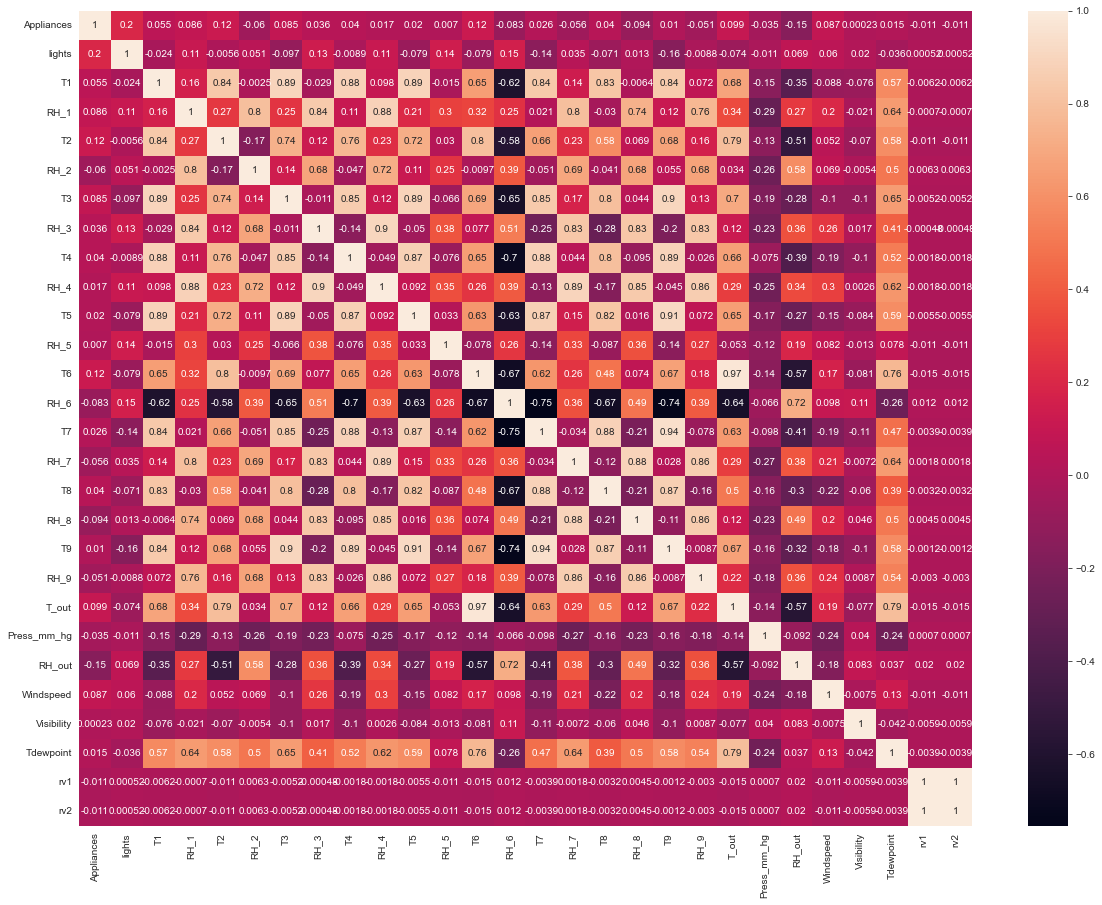

In [5]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True);

# Data Pre-Processing

## Feature Engineering
- Let's reduce the number of feature
- Let's resample the dataset by hours

In [6]:
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [7]:
df=df.rename(columns = {'T6':'T_outside', 'RH_6':'RH_outside'})
df["T_inside"] = (df["T1"] + df["T2"] + df["T3"] + df["T4"] + df["T5"] + df["T7"] + df["T8"] + df["T9"])/8
df["RH_inside"] = (df["RH_1"] + df["RH_2"] + df["RH_3"] + df["RH_4"] + df["RH_5"] + df["RH_7"] + df["RH_8"] + df["RH_9"])/8

In [8]:
drop_list = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
             'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'rv1', 'rv2']
df.drop(drop_list, axis = 1, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T_outside    19735 non-null  float64
 3   RH_outside   19735 non-null  float64
 4   Press_mm_hg  19735 non-null  float64
 5   Windspeed    19735 non-null  float64
 6   Visibility   19735 non-null  float64
 7   Tdewpoint    19735 non-null  float64
 8   T_inside     19735 non-null  float64
 9   RH_inside    19735 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 1.7 MB


In [10]:
df_a = df[["Appliances", "lights"]]
df_b = df.drop(["Appliances", "lights"], axis = 1)

In [11]:
df_a = df_a.resample("H").sum()
df_b = df_b.resample("H").mean()

In [12]:
df = pd.concat([df_a, df_b], axis =1)
df.head()

,Appliances,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
date,,,,,,,,,,
2016-01-11 17:00:00,330,210,6.587,84.260,733.750,6.167,53.417,5.050,18.415,46.555
2016-01-11 18:00:00,1060,310,6.180,87.204,734.267,5.417,40.000,4.658,18.408,46.520
2016-01-11 19:00:00,1040,150,5.857,88.131,734.792,6.000,40.000,4.392,18.686,48.665
2016-01-11 20:00:00,750,210,5.469,86.934,735.283,6.000,40.000,4.017,18.941,50.356
2016-01-11 21:00:00,620,140,5.579,86.129,735.567,6.000,40.000,3.817,19.254,48.977


In [13]:
df.shape

(3290, 10)

Let's also round off the data, to one decimal point precision, otherwise this may cause issues with our network (we will also normalize the data anyways, so this level of precision isn't useful to us)

In [14]:
df = df.round(2)

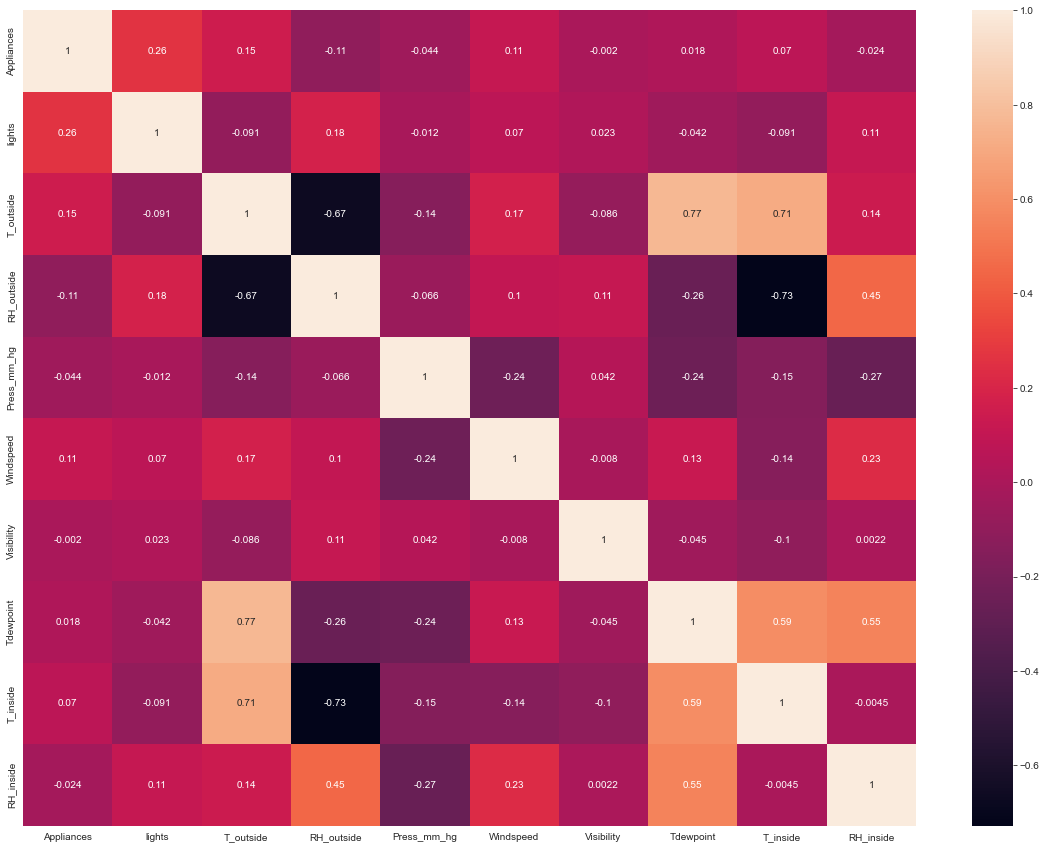

In [15]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True);

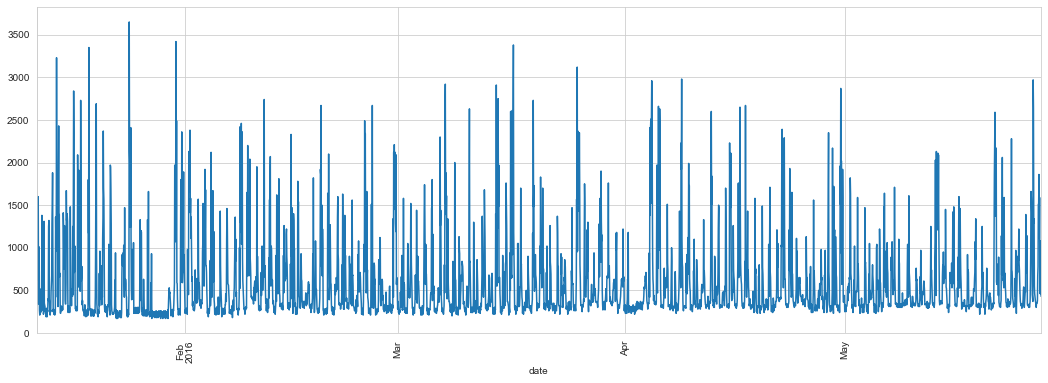

In [16]:
df['Appliances'].plot(figsize=(18,6))
plt.xticks(rotation=90);

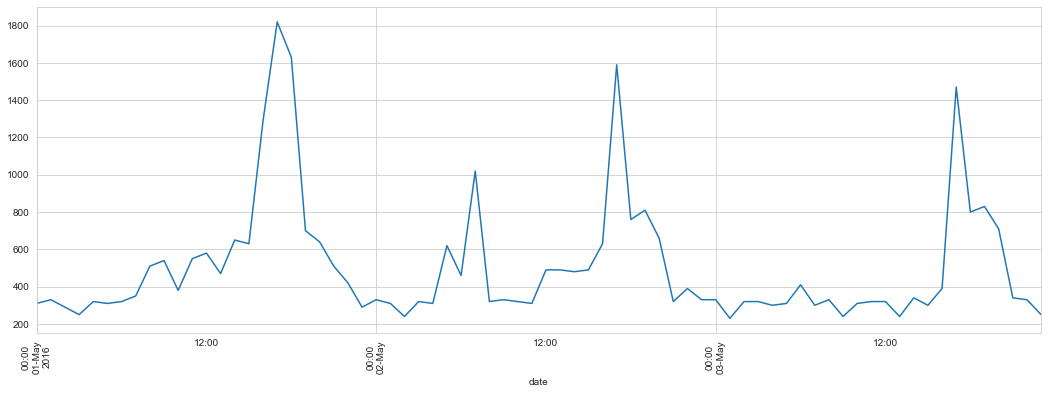

In [17]:
df['Appliances'].loc["2016-05-01 00:00:00" : "2016-05-03 23:00:00"].plot(figsize=(18,6))
plt.xticks(rotation=90);

### Train Test Split

Elimizde saatlik bir dataseti oldugu icin periyodumuzu gunluk olarak belirledik. 24 satirda bir periyot tamamlanacak. Bu yuzden 24 uzunlugunda bir sequence kuracagiz :

In [18]:
len(df)

3290

In [19]:
# How many rows per day?
24

24

In [20]:
test_days = 7

Sondan 7 gunluk kismi test satiri olarak ayiracagiz. 7*24=168 satirlik bir test datamiz olacak.

In [21]:
test_ind = test_days*24

In [22]:
test_ind

168

Datamizi train ve test olarak ayirdik :

In [23]:
train = df.iloc[:-test_ind]
test = df.iloc[-test_ind:]

In [24]:
train.shape, test.shape

((3122, 10), (168, 10))

### Scale Data

In [25]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

Bir onceki calismada tum dataya MinMaxScaler islemini uygulamistik. Train datasina fit_transform, test datasina sadece transform islemini uygulamistik.

Bu calismada ise hedef feature' imiz __Appliances,__ bunun uzerine forecast yapacagiz. Sadece Appliances feature' ina inverse_transform islemini uygulayacagimiz icin target sütununu ayri scale etmemiz gerekiyor. Bu modelde tek bir feature' a inverse_transform uygulayacagimiz icin toplu olarak scale islemi uygularsak hata verecektir. 

In [26]:
df.columns

Index(['Appliances', 'lights', 'T_outside', 'RH_outside', 'Press_mm_hg',
       'Windspeed', 'Visibility', 'Tdewpoint', 'T_inside', 'RH_inside'],
      dtype='object')

Target label haricindeki columns' lari bir listeye aldik (f_columns)

Iki ayri degiskene RobustScaler tanimladik. Fetaure' lar icin __f_transformer__, target label icin ise __target_transformer__ objectlerini kullanacagiz. Amacimiz feature' lar ve target' ı ayri ayri scale etmek.

__train.loc[:, f_columns] :__  Train datasinin f_columns' larini aldik ve fit_transform islemi uyguladik.

__train['Appliances'] :__ Train datasinin sadece Appliances sütununu aldik ve fit_transform islemi uyguladik. 

__test.loc[:, f_columns] :__ Feature' larin test kisimlarina sadece transform islemi uyguladik.

__test['Appliances'] :__ Target' in test kismina sadece transform islemi uyguladik.

Datayi ikiye bölerek scale islemlerini ayri ayri uygulamis olduk.

In [27]:
f_columns = df.columns[1:]     # Appliances haric

f_transformer = RobustScaler()
target_transformer = RobustScaler()

train.loc[:, f_columns] = f_transformer.fit_transform(train[f_columns])
train['Appliances'] = target_transformer.fit_transform(train[['Appliances']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns])
test['Appliances'] = target_transformer.transform(test[['Appliances']])

### Define a Function for Creating Time Steps 

Ayni datasetiyle yaptigimiz onceki calismada; datadan 24 sample al, 25. sample' i tahmin et demistik ve TimeseriesGenerator, verilen batch_size ve length' e gore bu islemleri yapmisti.

Bu calismada TimeseriesGenerator' in yaptigi islemi manuel olarak yapacagiz. 

Sequence uzunlugu 24 ise, 24 satirin tum verilerini alip modele verecegiz, bunlara göre sadece 25. satirdaki Appliances verisini tahmin etmesini isteyecegiz. Onceki notebook' ta kurdugumuz modelde 10 feature' ın hepsi egitime girmis ve sonucta 10 feature' in hepsi icin de birer tahmin degeri bulunmustu. Burda yine tum feature' lar egitime girecek (Appliances da dahil), sonucta sadece Appliances verisi tahmin edilecek. Birer kaydirma islemi yaparak sona kadar sirayla Applances verileri tahmin edilecek. TimeseriesGenerator bu yapiyi kuramadigi icin manuel olarak kuracagiz.

Bu yapiyi kurmak icin bir fonksiyon create ettik. Bu fonksiyon icine; islem yapacagimiz datanin X ve y' sini(X_train, y_train), adim sayimizi (time_steps) tanimladik.

X_train tüm data, y_train ise sadece Appliances sütunu olacak.

Bunun icin __Xs__ ve __ys__ isimli iki bos liste tanimladik. Xs listesine X_train degerleri, ys listesine ise y_train degerleri atilacak. 

for döngüsünde ilk olarak islem yapilacak uzunlugu belirledik :

__len(X) - time_steps :__ Uzunlugu, datanin son kismindaki time_steps kadar kismi haric olarak belirledik. Zaten son time_steps kadarlik kisimda islem yapamayacak. for döngüsu 0' dan baslacak length ne kadarsa o kisma kadar gidecek. 

__v = X.iloc[i:(i + time_steps)].values :__ i=0 olsun. Her döngüde, verdigimiz train datasinin 0 ile 0+time_steps (0+24)' e kadar kismini yani ilk 24 satirinin value' larini al  (value' lari alinca DataFrame' den array'e dönüstü). i sayisi her for döngüsüne girdiginde index 1 artacak ve yeni degerler olusacak.

__Xs.append(v) :__ Yukarida buldugun tüm degerleri Xs listesi icine at.

__ys.append(y.iloc[i + time_steps]) :__ y icine Appliances sütununu tanimlayacagiz. Yine ayni sekilde (i+time_steps) degerleri hesaplanacak ve ys listesine atilacak. 

__return np.array(Xs), np.array(ys) :__ Olusturdugun Xs ve ys listelerini array' e cevir.

Buraya kadar yapilan islemde sadece fonksiyonu tanimladik. 

__!!__ ML modellerinde target sütunu haricindeki sütunlar ile egitim yapip sonucta target sütununu tahmin ediyorduk. Burda ise egitime target sütunundaki degerler de dahil oluyor ve yine target sütunu tahmin ediliyor. __!!__

In [28]:
def create_dataset(X, y, time_steps=1):
    """ Create data sequence
    
    Arguments:
        * X: time-series data
        * y: target value
        * time_steps: Used to create input sequence of timesteps
    
    Returns:
        * input_sequence: Numpy array of sequences of time-series data
        * output: Numpy array of output i.e. next value for respective sequence
    
    """
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

Yukarida olusturdugumuz __create_dataset__ fonksyionunu kullanarak X_train ve y_train' i olusturduk.

X_train=train datasini, y_train=train.Appliances sütununu tanimladik. Ayni sekilde X_test=test datasini, y_test=test.Appliances sütununu tanimladik. time_steps' i de 24 olarak tanimladik. Datanin tum 24 satiri egitime girecek, sonucta Appliances sütunundaki 25. deger tahmin edilecek ve asagi dogru birer kaydirarak sona kadar bu islem devam edecek.

In [29]:
time_steps = 24

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.Appliances, time_steps)
X_test, y_test = create_dataset(test, test.Appliances, time_steps)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3098, 24, 10) (3098,)
(144, 24, 10) (144,)


24' lü paketler halinde 10 sutundan olusan 3098 satirlik X_train datasi; 24' lü paketler halinde 10 sutundan olusan 144 satirlik X_test datasi; 3098 satir ve tek sutundan olusan y_train datasi; 144 satir ve tek sutundan olusan y_test datasi olustu.

In [30]:
y_test    # 144 elemandan olusan bir array

array([ 0.77777778,  0.55555556,  1.22222222,  0.19444444,  1.44444444,
       -0.02777778, -0.08333333, -0.16666667, -0.13888889, -0.11111111,
       -0.19444444, -0.05555556,  0.02777778,  2.13888889,  0.86111111,
        2.33333333,  4.69444444,  1.08333333,  0.69444444,  0.75      ,
        0.58333333,  0.44444444,  3.38888889,  0.97222222,  0.58333333,
        0.91666667,  0.44444444,  0.27777778, -0.02777778, -0.05555556,
       -0.16666667, -0.05555556, -0.16666667, -0.19444444,  0.08333333,
       -0.02777778, -0.08333333, -0.16666667, -0.11111111, -0.16666667,
       -0.08333333,  0.        , -0.08333333, -0.05555556,  0.19444444,
        1.58333333,  5.30555556,  1.02777778,  0.97222222,  0.72222222,
        0.11111111,  0.02777778, -0.05555556, -0.19444444, -0.08333333,
       -0.11111111, -0.13888889, -0.13888889,  0.75      ,  0.16666667,
        1.66666667, -0.08333333, -0.38888889,  0.08333333,  0.66666667,
        1.11111111,  0.94444444,  1.47222222,  1.33333333,  1.33

In [31]:
X_test    # 24' lü paketlerden, 10 sütundan olusan 3098 veri

array([[[ 0.05555556,  0.        ,  1.85198176, ...,  1.17783133,
          1.5       ,  0.97491039],
        [ 0.13888889,  0.        ,  1.29638723, ...,  1.15084337,
          1.42346939,  0.79032258],
        [ 0.05555556,  0.5       ,  0.99894774, ...,  1.38409639,
          1.36734694,  0.76702509],
        ...,
        [ 0.63888889,  0.5       ,  2.56611715, ...,  1.66361446,
          1.94387755,  0.94086022],
        [ 0.55555556,  0.5       ,  2.59417748, ...,  1.77542169,
          1.97959184,  0.90681004],
        [ 1.05555556,  1.        ,  2.53945984, ...,  1.89879518,
          1.9744898 ,  0.96415771]],

       [[ 0.13888889,  0.        ,  1.29638723, ...,  1.15084337,
          1.42346939,  0.79032258],
        [ 0.05555556,  0.5       ,  0.99894774, ...,  1.38409639,
          1.36734694,  0.76702509],
        [-0.13888889,  0.5       ,  0.87267625, ...,  1.48240964,
          1.34693878,  0.82795699],
        ...,
        [ 0.55555556,  0.5       ,  2.59417748, ...,  

## Model Building with LSTM

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

Feature sayisini baslangicta bir degiskene atadik, ihtiyacimiz oldugunda bu degiskeni cagiracagiz :

In [33]:
n_features = X_train.shape[2]     # X_train (3098,24,10) idi. 2. indexi yani 10 degerini degiskene atadik.

__input_shape=(time_steps, n_features) :__ 24' e 10' luk bir veri tanimlamis olduk.

Önceki notebook' ta LSTM ile modelimizi kurmustuk. Burda __Bidirectional'__ i da ekledik.

__Bidirectional :__ Veriler modele normal sirasiyla girer, sonra bir de tersten girer. Yani ilk 24 data bastan sona modele girecek, sonra 24' ten geriye dogru tekrar modele girecek. Bu ikisinin agirliklarin toplami bir sonraki katmana aktarilacak. Sona kadar her time_step' te bu islem tekrarlanacak. 

Modelimizde tek katman olusturduk. Baska katmanlar ve dropout da eklenebilirdi.

Önceki notebook' ta output layer' imizi feature sayisi kadar, yani 10 olarak tanimlamistik. Burada ise sadece Appliances sütununu tahmin etmek istedigimiz icin __(Dense(units=1)__ olarak belirledik. 

In [34]:
model = Sequential()

model.add(Bidirectional(LSTM(units=100, input_shape=(time_steps, n_features))))

#model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

2022-08-24 12:05:23.740739: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


__restore_best_weights = True :__ EarlyStop 5 kere üst üste kötü bir skor verirse duracak. Yani sondan 5. deger aslinda egitimin durmasi gereken yer. Bu parametre de son 5' de en iyi agirlik degerlerinin oldugu yeri alacaktir. 

__batch_size=24 :__ Veri cok fazla oldugu icin egitimi uzatmamak adina 24 verdik. (Önceki notebook' ta 1 vermistik). Burada 1 degerini de denedik fakat skorlarda pek bir degisme olmadi. 24 vererek zamandan tasarruf etmis olduk. 

__shuffle=False :__ Default=True. Bunun anlami, her epoch' ta bir data karılır. Datamiz zaten 24' lük paketler halinde oldugu icin karma islemi paketler icinde yapilacak. Önceki notebook' ta paketleme isini TimeseriesGenerator yaptigi icin shuffle=True olmasinda yine bir sakinca yoktu. 

__!!!__ TimeseriesGenerator icinde de shuffle parametresi var ve bu parametrenin default degeri False. Henuz paketler olusmamis durumda oldugu icin karma islemi yapilmiyor. __!!!__

In [35]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [36]:
model.fit(X_train, y_train, 
          epochs=30, 
          batch_size=24, 
          validation_split=0.3,
#          shuffle=False,
          callbacks=[early_stop])

Epoch 1/30
91/91 [==============================] - 10s 54ms/step - loss: 1.4699 - val_loss: 0.8958
Epoch 2/30
91/91 [==============================] - 4s 39ms/step - loss: 1.2027 - val_loss: 0.8527
Epoch 3/30
91/91 [==============================] - 3s 35ms/step - loss: 1.1463 - val_loss: 0.9815
Epoch 4/30
91/91 [==============================] - 3s 37ms/step - loss: 1.1182 - val_loss: 0.8336
Epoch 5/30
91/91 [==============================] - 3s 35ms/step - loss: 1.0824 - val_loss: 0.8679
Epoch 6/30
91/91 [==============================] - 3s 38ms/step - loss: 1.0508 - val_loss: 0.8858
Epoch 7/30
91/91 [==============================] - 3s 37ms/step - loss: 1.0206 - val_loss: 0.8554
Epoch 8/30
91/91 [==============================] - 4s 42ms/step - loss: 0.9943 - val_loss: 0.8678
Epoch 9/30
91/91 [==============================] - 4s 47ms/step - loss: 0.9442 - val_loss: 0.8846


loss ve val_los degeri sonlara dogru birbirlerine biraz yaklasmislar fakat cok iyi bir grafik elde ettigimizi söyleyemeyiz :

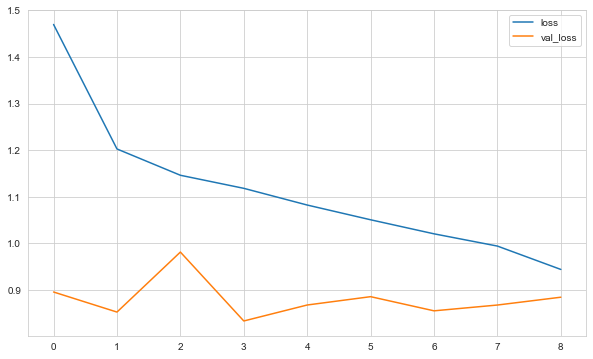

In [37]:
losses = pd.DataFrame(model.history.history)
losses.plot();

## Evaluate on Test Data

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Regression problemi ile ugrastigimiz icin regression metriklerini tanimladik :

In [39]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

### First way : after each prediction, reel value will be used for next prediction¶

"Her prediction' dan sonra gercek degeri sonraki prediction icin kullan." Simdiye kadarki forecast islemlerinde buldugumuz prediction degerini sonraki forecast icin kullaniyorduk. Burada kullandigimiz ilk yolda ileriye dogru bir forecast yapilip prediction üzerine prediction kurulmadi. 24 veriden sonra bir tahmin yapildi, bu tahmini bir sonraki adimda kullanilmadi, test datasinda gercek deger alinarak o kullanildi. Yapilan calismalarda bu mantikta cözülmüs notebook' lar görebiliriz. Ama dogru olan yol, prediction üzerine prediction yapilmasidir. Bu yöntemi second way' de uyguladik.

Bazi durumlarda first way' in de kullanim alanlari vardir. Örnegin olusturulan model, uzun forecast yerine anlik tahmin istiyor olabilir (Fabrika sensörleri gibi). 1 dk veya 3 dk sonra ne olacaginin tahmin edilmesi ve ona göre ariza vermesindense cihazin calismayi durdurmasi istenebilir. Bu tarz modellerde bu yöntem kullanilabilir.

ML' deki gibi predict icine test datasini verdik ve sonuc olarak bir array döndü :

In [40]:
y_pred = model.predict(X_test)
y_pred

5/5 [==============================] - 1s 18ms/step


array([[ 0.6644236 ],
       [ 0.38360813],
       [ 0.13309814],
       [ 0.11258668],
       [-0.10218775],
       [ 0.03933944],
       [-0.08811168],
       [-0.15293913],
       [-0.22026551],
       [-0.22488894],
       [-0.1665235 ],
       [-0.10046302],
       [-0.012878  ],
       [ 0.14710858],
       [ 0.6409092 ],
       [ 0.8518313 ],
       [ 1.2803845 ],
       [ 2.0826552 ],
       [ 1.9949181 ],
       [ 1.8201648 ],
       [ 1.7523847 ],
       [ 1.5138252 ],
       [ 1.3694496 ],
       [ 1.7973044 ],
       [ 1.6340151 ],
       [ 1.4456406 ],
       [ 1.4341049 ],
       [ 1.3132949 ],
       [ 1.2192096 ],
       [ 0.88635343],
       [ 0.79417515],
       [ 0.6285081 ],
       [ 0.5208296 ],
       [ 0.4041589 ],
       [ 0.26951206],
       [ 0.24361797],
       [ 0.29070914],
       [ 0.36367434],
       [ 0.28728548],
       [ 0.34717932],
       [ 0.2413887 ],
       [-0.04448213],
       [-0.0315837 ],
       [ 0.0313246 ],
       [ 0.00679112],
       [ 0

Oldukca düsuk bir skor aldik fakat skorlari grafik ile degerlendirmek daha saglikli bir sonuc verecektir :

In [41]:
eval_metrics(y_test, y_pred)

r2_score: 0.17557611058415445 
mae: 0.7245261030620895 
mse: 1.4385243804923655 
rmse: 1.19938500094522


### Inverse Transformation and Compare

Feature' lari ve target label' ı ayri ayri scale etmistik. Target label' ın transform islemini __target_transformer__ degiskeni icinde yapmistik. 

y_train, y_test ve y_pred degerlerini grafiklerde saglikli bir kiyaslama yapabilmek adina __inverse_transform__ ile scale edilmis halden gercek degerlerine dönüştürdük.

__inverse_transform__ islemi yaparken y_train ve y_test' i reshape ile tek satirli array haline dönüştürdük. Bu sekilde y_train, y_test ve y_pred verilerinin hepsi ayni formata dönüşmüş oldu :

In [42]:
y_train_inv = target_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = target_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = target_transformer.inverse_transform(y_pred)

Train datasi ile modeli egittik, test datasi ile sonuc aldik. Test datasi ile prediction' lari yan yana koydugumuz bir DataFraeme olusturmak istiyoruz. Index olarak da train datasindaki test ve prediction satirina karsilik gelen indexler olsun istiyoruz.

Bunun icin ilk olarak index kismini olusturacagiz. Train datasi ile egitimi yaptik, test datasi ile de prediction' lari aldik. Ilk prediction, test datasinin 25. satirinda yani 24. indexte. Cunku ilk 24 data egitime girdi, Appliances' in 25. degeri predict edildi. 

__test_index = test.iloc[time_steps:].index :__ time_steps=24' tü. 24. datadan sonrasini al ve sona kadar git dedik. Bu sekilde DataFrame' in index sütununu olusturmus olduk. 

Ikinci satirda yaptigimiz islem : y_test_inv' i reshape yaptik ve y_pred_inv ile concat yaparak yan yana birlestirdik ve bir DataFrame olusturduk. 

y_test_inv' ü tekrar reshape yaparak satir halinden tek bir sütun haline getirdik.

Ücüncü satirda columns isimlerini degistirdik.

__pred_test.index = test_index :__ DataFrame' e index olarak test_index' i ata.

Prediction' larimiz 25. veriden itibaren baslamisti. Test datasindaki 25. degerden itibaren prediction' a karsilik gelen degerleri bir DataFrame' de yazdirmis olduk :

In [43]:
test_index = test.iloc[time_steps:].index

pred_test = pd.concat([pd.DataFrame(y_test_inv.reshape(-1, 1)),
                       pd.DataFrame(y_pred_inv)], axis = 1)
pred_test.columns=['test','prediction']
pred_test.index = test_index
pred_test

,test,prediction
date,,
2016-05-21 19:00:00,650.000,609.193
2016-05-21 20:00:00,570.000,508.099
2016-05-21 21:00:00,810.000,417.915
2016-05-21 22:00:00,440.000,410.531
2016-05-21 23:00:00,890.000,333.212
...,...,...
2016-05-27 14:00:00,610.000,924.263
2016-05-27 15:00:00,460.000,775.318
2016-05-27 16:00:00,810.000,655.648


3 plot' u üst üste cizdirdik. 

Ilk plotta x eksenine "0' dan basla, y_train boyutu kadar kadar git" dedik; y eksenine y_train_inv kismini verdik ve bunlari yesil olarak cizdirdik.

Ikinci plotta x eksenine "y_train'den basla, y_train+y_test uzunlugu kadar devam et" dedik; y eksenine y_train_inv kismini verdik ve rengi mavi olarak belirledik. (Bu kisim test datasi, kiyaslama yapacagimiz yer)

Ücüncü plotta x ekseni icin ikinci plottaki ayni yeri verdik; y ekseni icin ise tahmin degerlerini verdik ve rengi kirmizi olarak belirledik. 

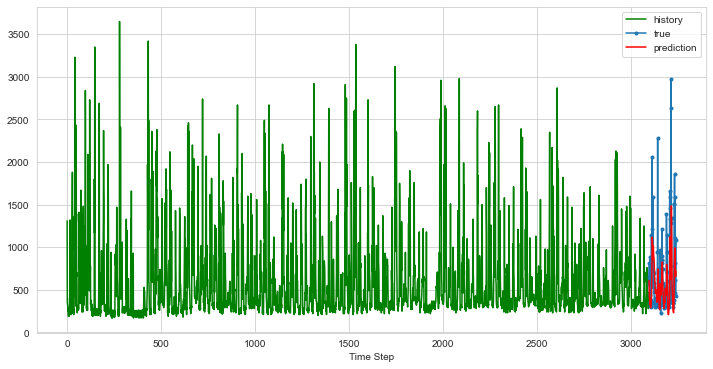

In [45]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.xlabel('Time Step')
plt.legend()
plt.show();

Yukarida karisik bir görüntü olustugu icin sadece son kismi alarak inceledik. Yukarida aldigimiz r2 skorunun grafigini asagida goruyoruz :

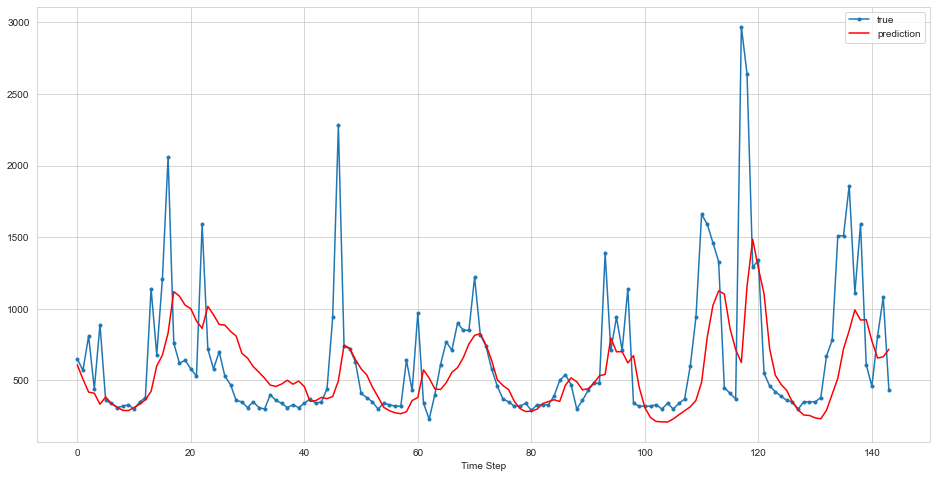

In [47]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.xlabel('Time Step')
plt.legend()
plt.show();

### Second way : after each prediction, result will be used for next prediction

Bu yöntemde üsttekinin aksine, reel degerler yerine prediction' lari bir sonraki forecast' e koyarak islem yapacagiz. 

In [48]:
test

,Appliances,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
date,,,,,,,,,,
2016-05-20 19:00:00,0.056,0.000,1.852,-1.082,0.196,0.279,0.000,1.178,1.500,0.975
2016-05-20 20:00:00,0.139,0.000,1.296,-0.898,0.201,-0.115,0.000,1.151,1.423,0.790
2016-05-20 21:00:00,0.056,0.500,0.999,-0.598,0.209,-0.559,0.000,1.384,1.367,0.767
2016-05-20 22:00:00,-0.139,0.500,0.873,-0.435,0.220,-0.721,0.000,1.482,1.347,0.828
2016-05-20 23:00:00,-0.278,0.000,0.890,-0.289,0.208,-0.603,-0.561,1.631,1.321,0.889
...,...,...,...,...,...,...,...,...,...,...
2016-05-27 14:00:00,0.667,0.500,2.622,-1.090,-0.018,-0.441,-2.255,1.991,2.219,0.980
2016-05-27 15:00:00,0.250,0.000,2.722,-1.090,-0.030,-0.441,-2.224,1.949,2.214,0.896
2016-05-27 16:00:00,1.222,0.000,2.702,-1.090,-0.058,-0.324,-2.132,1.953,2.240,0.998


Test datasinin target label haric ilk 24 satirini aldik ve bir degiskene atadik :

In [49]:
df_fake = test.iloc[:time_steps,1:]
df_fake

,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
date,,,,,,,,,
2016-05-20 19:00:00,0.000,1.852,-1.082,0.196,0.279,0.000,1.178,1.500,0.975
2016-05-20 20:00:00,0.000,1.296,-0.898,0.201,-0.115,0.000,1.151,1.423,0.790
2016-05-20 21:00:00,0.500,0.999,-0.598,0.209,-0.559,0.000,1.384,1.367,0.767
2016-05-20 22:00:00,0.500,0.873,-0.435,0.220,-0.721,0.000,1.482,1.347,0.828
2016-05-20 23:00:00,0.000,0.890,-0.289,0.208,-0.603,-0.561,1.631,1.321,0.889
2016-05-21 00:00:00,0.000,0.864,-0.193,0.180,-0.324,-1.398,1.829,1.301,0.941
2016-05-21 01:00:00,0.000,0.892,-0.131,0.143,-0.045,-0.857,1.833,1.286,0.964
2016-05-21 02:00:00,0.000,0.852,-0.123,0.104,0.117,0.000,1.822,1.276,0.977
2016-05-21 03:00:00,0.000,0.773,-0.107,0.076,0.117,-0.561,1.799,1.265,0.987


Test datasinin sadece target label' inin ilk 24 satirini aldik ve bir degiskene atadik (Kiyaslama yapmak icin bunu kullanacagiz):

In [50]:
reel = np.array(test.iloc[:time_steps,:1])
reel.reshape((1,-1))[0]

array([ 0.05555556,  0.13888889,  0.05555556, -0.13888889, -0.27777778,
       -0.22222222, -0.16666667, -0.08333333, -0.22222222, -0.08333333,
       -0.16666667, -0.02777778, -0.08333333,  2.44444444,  4.13888889,
        5.36111111,  6.16666667,  2.77777778,  4.69444444,  4.02777778,
        5.        ,  0.63888889,  0.55555556,  1.05555556])

In [51]:
df_fake

,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
date,,,,,,,,,
2016-05-20 19:00:00,0.000,1.852,-1.082,0.196,0.279,0.000,1.178,1.500,0.975
2016-05-20 20:00:00,0.000,1.296,-0.898,0.201,-0.115,0.000,1.151,1.423,0.790
2016-05-20 21:00:00,0.500,0.999,-0.598,0.209,-0.559,0.000,1.384,1.367,0.767
2016-05-20 22:00:00,0.500,0.873,-0.435,0.220,-0.721,0.000,1.482,1.347,0.828
2016-05-20 23:00:00,0.000,0.890,-0.289,0.208,-0.603,-0.561,1.631,1.321,0.889
2016-05-21 00:00:00,0.000,0.864,-0.193,0.180,-0.324,-1.398,1.829,1.301,0.941
2016-05-21 01:00:00,0.000,0.892,-0.131,0.143,-0.045,-0.857,1.833,1.286,0.964
2016-05-21 02:00:00,0.000,0.852,-0.123,0.104,0.117,0.000,1.822,1.276,0.977
2016-05-21 03:00:00,0.000,0.773,-0.107,0.076,0.117,-0.561,1.799,1.265,0.987


In [52]:
df_fake.shape

(24, 9)

In [53]:
df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1])).shape

(24, 1, 9)

Asagidaki fonksiyonda öncelikle bos bir liste tanimladik. 

__first_eval_batch :__ Train datasinin son 24 verisini al (Burdan itibaren ileriye dogru forecast yaptiracagiz.)

__current_batch :__ first_eval_batch' in shape' ini degistir. Son 24 satirin boyutu 1 artmis oldu (1,24,10).

__features :__ df_fake icine test datasinin ilk 24 satirini almistik. df_fake.values 'le bunu array' e cevirdik ve reshape uyguladik. df_fake' in shape' i normalde (24,9) idi. reshape islemi ile (24,1,9)' luk array haline getirmis olduk.

Train datasinin ilk 24 satirdaki degerleri alinacak bu degerlere gore test datasinin bastan sona sirayla 24 Appliances degeri tahmin edilecek. Bu tahmin degerinin yanina ilgili  Appliances disindaki diger sütunlari da vermek istiyoruz (Diger 9 feature). Bu iki yapi birlestirilecek. Her forecast isleminde ilk satir dusecek, yeni prediction degeri ve onunla alakali diger 9 feature degerleri gelecek. (Her islemde bir dahaki satira Appliances kisminda prediction, ve 9 feature' in gercek degerleri gelecek ve bunlar bir sonraki satir tahmininde kullanilacak; bastaki ilk satir da silinecek. Bu sekilde 24 datada bir tahmin yapilarak islem sona kadar devam edecek.)

Önceki notebook' ta her forecast isleminde 1 prediction gelince üstteki bir satir iptal oluyordu, burada ise 1 satirdaki 10 feature degeri gidecek, onun yerine alttaki satirdaki 1 prediction degeri (Alliances degeri) ve 9 feature degeri gelecek. (Bir satirda 1 prediction' a ait, 9 feature' a ait, toplam 10 deger)

24 tane (1,9)' luk array' in her birini for döngüsü icinde sirasi geldikce sequence sonuna eklemis olacagiz.

for döngüsü time_step kadar calisacak (Yani 24 kere).

__current_pred :__ Train datasinin son 24 value' su ile prediction yapilacak. Her for dongusu sonucu tahmin edilen Appliances degeri  basta olusturdugumuz prediction_scaled listesi icine atilacak. 

__new :__ features degiskeninde 24 adet 1' e 9' luk array olusturmustuk. Bunun i. indexini al, [0] ile two dimensional array' i tek dimension' a indir, tolist ile liste haline cevir. (Listeye cevirdik cunku insert fonksiyonunu kullanacagiz ve insert sadece listede calisir). Bu sekilde 24 for dongusu sonunda ilgili Appliances sutununa karsilik gelen 9 feature' in degerleri buraya gelecek fakat ilk sütuna eklememiz gereken Applience prediction' lari eksik.

__new.insert :__ Olusturdugumuz liste icerisine 0. eleman olarak yaptigimiz prediction'i (current_pred[0][0]) koy. ([0][0] ile array icine girip sadece degeri cektik). Bu sekilde Appliances' a ait prediction degerlerini ve ilgili satirdaki feature degerlerini birlestirdigimiz bir liste elde ettik. 

__new :__  new' i array' e cevirdik ve shape' ini (1,1,10) olarak guncelledik. (1 satir, 10 sütun var)

__current_batch :__ Onceki notebook' larda current_batch'e eleman ekliyorduk, burada ise olusturdugumuz new listesini ekleyerek prediction ile birlikte ilgili feature bilgilerini de eklemis olduk. Her yeni prediction geldiginde ilk satir silinecek yerini yeni prediction degeri alacak. 

In [54]:
predictions_scaled = []

first_eval_batch = train.values[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, n_features))
features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))

for i in range(time_steps):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0])
    new = features[i][0].tolist()
    new.insert(0,current_pred[0][0])
    new = np.array(new).reshape(1,1,n_features)
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis=1)

1/1 [==============================] - 0s 21ms/step


Ileriye dogru yapilan forecast (Appliances) degerleri :

In [55]:
predictions_scaled

[array([0.2262927], dtype=float32),
 array([0.06668542], dtype=float32),
 array([-0.13373052], dtype=float32),
 array([-0.22427219], dtype=float32),
 array([-0.2815829], dtype=float32),
 array([-0.40295118], dtype=float32),
 array([-0.5052792], dtype=float32),
 array([-0.5303743], dtype=float32),
 array([-0.44374907], dtype=float32),
 array([-0.358495], dtype=float32),
 array([-0.19827032], dtype=float32),
 array([-0.01085567], dtype=float32),
 array([0.14508499], dtype=float32),
 array([0.25458658], dtype=float32),
 array([0.25137714], dtype=float32),
 array([0.3149584], dtype=float32),
 array([0.37811205], dtype=float32),
 array([0.58354914], dtype=float32),
 array([0.73180115], dtype=float32),
 array([0.83833736], dtype=float32),
 array([0.9084605], dtype=float32),
 array([0.942369], dtype=float32),
 array([0.92943645], dtype=float32),
 array([0.8271178], dtype=float32)]

Gercek Appliances degerleri :

In [56]:
reel

array([[ 0.05555556],
       [ 0.13888889],
       [ 0.05555556],
       [-0.13888889],
       [-0.27777778],
       [-0.22222222],
       [-0.16666667],
       [-0.08333333],
       [-0.22222222],
       [-0.08333333],
       [-0.16666667],
       [-0.02777778],
       [-0.08333333],
       [ 2.44444444],
       [ 4.13888889],
       [ 5.36111111],
       [ 6.16666667],
       [ 2.77777778],
       [ 4.69444444],
       [ 4.02777778],
       [ 5.        ],
       [ 0.63888889],
       [ 0.55555556],
       [ 1.05555556]])

Forecast sonucu aldigimiz Appliances degerleri ile gercek degerleri eval_metric icine vererek bir skor aldik. Feature bilgileri yetersiz oldugu icin kötü bir skor aldik :

In [57]:
eval_metrics(reel, predictions_scaled)

r2_score: -0.1557172905881019 
mae: 1.3965482364141348 
mse: 5.299859931373374 
rmse: 2.3021424654815292


### Inverse Transformation and Compare

Second way' de de inverse_transform islemi yaparak scale edilmis degerleri gercek degerlere cevirdik ve gorsellestirdik :

In [58]:
predictions = target_transformer.inverse_transform(predictions_scaled)
reel = target_transformer.inverse_transform(reel)

compare isimli degiskenin icine data olarak gercek Appliances degerlerini, index olarak test datasinin ilk 24 indexini verdik ve columns ismi verdik. Olusturdugumuz DataFrame' e prediction degerlerini de sutun olarak ekledik ve plot grafigini cizdik :

In [59]:
compare = pd.DataFrame(data = reel, index = test.index[:time_steps], columns = ["reel"])
compare["prediction"] = predictions
compare

,reel,prediction
date,,
2016-05-20 19:00:00,390.000,451.465
2016-05-20 20:00:00,420.000,394.007
2016-05-20 21:00:00,390.000,321.857
2016-05-20 22:00:00,320.000,289.262
2016-05-20 23:00:00,270.000,268.630
2016-05-21 00:00:00,290.000,224.938
2016-05-21 01:00:00,310.000,188.099
2016-05-21 02:00:00,340.000,179.065
2016-05-21 03:00:00,290.000,210.250


train ve test datasinin bölündüğü yer kotu bir yere denk geldigi icin model kötü tahminler yapmis :

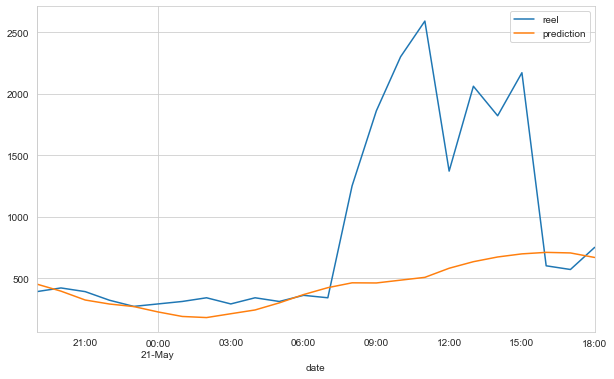

In [60]:
compare.plot();

## Retrain and Forecasting with Full Data

### Scale full data

Yukarida yaptigimiz islemlerin aynisini butun data icin yapacagiz. Datamizin kopyesini bir degiskene attik :

In [61]:
df_scaled = df.copy()

Train ve test olarak ayirmadan datanin tamamina scale islemi uyguladik fakat yine target label' a ve diger feature' lari ayri ayri scale ettik :

In [62]:
f_columns = df_scaled.columns[1:]

f_transformer = RobustScaler()
target_transformer = RobustScaler()

df_scaled.loc[:, f_columns] = f_transformer.fit_transform(df_scaled[f_columns])
df_scaled['Appliances'] = target_transformer.fit_transform(df_scaled[['Appliances']])

In [63]:
df_scaled      # Scale edilmis data

,Appliances,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
date,,,,,,,,,,
2016-01-11 17:00:00,-0.139,10.500,-0.092,0.546,-2.233,0.757,1.643,0.290,-1.038,1.027
2016-01-11 18:00:00,1.889,15.500,-0.146,0.601,-2.181,0.538,0.000,0.221,-1.043,1.022
2016-01-11 19:00:00,1.833,7.500,-0.188,0.619,-2.129,0.708,0.000,0.173,-0.910,1.392
2016-01-11 20:00:00,1.028,10.500,-0.239,0.596,-2.080,0.708,0.000,0.107,-0.790,1.682
2016-01-11 21:00:00,0.667,7.000,-0.225,0.581,-2.051,0.708,0.000,0.072,-0.643,1.445
...,...,...,...,...,...,...,...,...,...,...
2016-05-27 14:00:00,0.639,0.500,2.403,-1.016,-0.030,-0.462,-2.255,1.785,2.024,0.914
2016-05-27 15:00:00,0.222,0.000,2.496,-1.016,-0.043,-0.462,-2.224,1.746,2.019,0.833
2016-05-27 16:00:00,1.194,0.000,2.478,-1.016,-0.072,-0.339,-2.132,1.749,2.043,0.931


Let's devide dataset as "full" and "val". We can think about this "val" data as the weather forecast of next days.

Forecast isleminde kullanmak uzere son 24 satiri ayirdik.

Bunun icin 24 satirlik bir degisken tanimladik. Bastan son 24' e kadar olan kismi egitim datasi, son 24' u ise validation islemi icin ayirdik :

In [64]:
val_size = 24
val = df_scaled.iloc[-val_size:]
full = df_scaled.iloc[:-val_size]
print(len(full), len(val))

3266 24


### reshape to [samples, time_steps, n_features]

Yukarida olusturdugumuz creat_dataset fonksiyonu icine datayi ve target labela verdik. Datayi modele verebilmek icin 24' lu paketler haline getirmis olduk :

In [65]:
X, y = create_dataset(full, full.Appliances, time_steps)

print(X.shape, y.shape)

(3242, 24, 10) (3242,)


### Create Final model with full data

In [66]:
model = Sequential()

model.add(Bidirectional(LSTM(units=100, input_shape=(time_steps, n_features))))

#model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

Sadece epoch suresini kisaltarak egitim asamasinda kurdugumuz modelin aynisini kurduk :

In [67]:
model.fit(X, y, 
          epochs=15, 
          batch_size=24, 
         # shuffle=False
         )

Epoch 1/15
136/136 [==============================] - 9s 31ms/step - loss: 1.3480
Epoch 2/15
136/136 [==============================] - 4s 32ms/step - loss: 1.1008
Epoch 3/15
136/136 [==============================] - 4s 30ms/step - loss: 1.0434
Epoch 4/15
136/136 [==============================] - 5s 35ms/step - loss: 1.0334
Epoch 5/15
136/136 [==============================] - 5s 33ms/step - loss: 1.0021
Epoch 6/15
136/136 [==============================] - 4s 31ms/step - loss: 0.9842
Epoch 7/15
136/136 [==============================] - 5s 33ms/step - loss: 0.9435
Epoch 8/15
136/136 [==============================] - 3s 25ms/step - loss: 0.8896
Epoch 9/15
136/136 [==============================] - 3s 26ms/step - loss: 0.8715
Epoch 10/15
136/136 [==============================] - 3s 25ms/step - loss: 0.8573
Epoch 11/15
136/136 [==============================] - 4s 26ms/step - loss: 0.8108
Epoch 12/15
136/136 [==============================] - 4s 27ms/step - loss: 0.7680
Epoch 13/15
1

Herhangi bir validation datasi vermedigimiz icin loss degeri uzerinden grafigi cizdirdik :

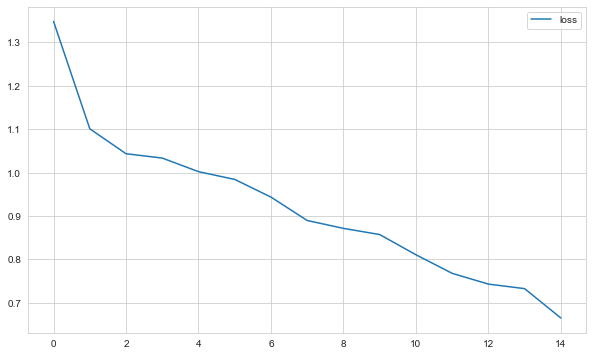

In [68]:
losses = pd.DataFrame(model.history.history)
losses.plot();

### forecasting

Yukarida forecast isleminde test datasini kullanmistik, burada ise ayirdigimiz val datasini kullanacagiz. Yaptigimiz prediction' larin yanina yine ilgili 9 feature' i verecegiz. Ilk sutunda gercek Appliances degerleri yerine prediction degerleri olacak ki model, forecast yaparken her adimda  prediction degeri ile feature degerlerinden bilgi alabilsin :

In [69]:
df_fake = val.iloc[:,1:]
df_fake

,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
date,,,,,,,,,
2016-05-26 19:00:00,0.000,2.011,-1.016,-0.060,-0.170,-0.786,1.134,1.862,0.749
2016-05-26 20:00:00,4.500,1.634,-1.006,-0.048,-0.170,-0.867,1.237,1.838,1.143
2016-05-26 21:00:00,4.000,1.311,-0.842,-0.018,-0.047,-0.092,1.368,1.762,0.990
2016-05-26 22:00:00,6.000,1.111,-0.704,0.000,0.123,2.794,1.444,1.738,0.974
2016-05-26 23:00:00,5.500,0.996,-0.619,0.000,0.000,2.886,1.403,1.695,0.954
2016-05-27 00:00:00,1.000,0.932,-0.513,-0.008,-0.292,2.764,1.355,1.671,0.966
2016-05-27 01:00:00,0.000,0.910,-0.465,-0.028,-0.462,2.693,1.338,1.633,0.959
2016-05-27 02:00:00,0.000,0.875,-0.401,-0.036,-0.585,2.641,1.334,1.605,0.974
2016-05-27 03:00:00,0.000,0.833,-0.336,-0.043,-0.389,2.163,1.375,1.576,0.983


val datasinin ilk sütununu (Appliance) forecast isleminden sonra prediction' lar ile kiyaslamak uzere reel isimli degiskene atadik :

In [70]:
reel = np.array(val.iloc[:,:1])
reel.reshape((1,-1))[0]

array([ 2.66666667,  0.47222222,  0.22222222,  0.11111111,  0.02777778,
       -0.05555556, -0.08333333, -0.22222222, -0.08333333, -0.08333333,
       -0.08333333,  0.        ,  0.80555556,  1.11111111,  3.13888889,
        3.13888889,  4.11111111,  2.02777778,  3.36111111,  0.63888889,
        0.22222222,  1.19444444,  1.94444444,  0.13888889])

### First way : after each prediction, reel value will be use for next prediction¶

Yine 2 yolla da forecast' leri olusturduk.

__new.insert(0,reel[i][0]) :__ Yaptigimiz prediction' lar yerine gercek degerleri kullandik. Gercek degerler ile bir sonraki forecast islemi yapilacak.

In [71]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 24

first_eval_batch = full.values[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, full.shape[1]))
features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))

for i in range(periods):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)[0][0]
    
    # store prediction
    forecast.append(current_pred) 
    new = features[i][0].tolist()
    new.insert(0,reel[i][0])
    new = np.array(new).reshape(1,1,full.shape[1])
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis = 1)

1/1 [==============================] - 0s 29ms/step


Aldigimiz r2 skoru yine kötü cikti :

In [72]:
eval_metrics(reel.reshape((1,-1))[0], forecast)

r2_score: -0.002068139369003852 
mae: 0.9093309547838375 
mse: 1.7366678918939353 
rmse: 1.3178269582513233


inverse_transform ile gercek degerlere ulastik ve bu degerlere gore grafigi cizdirecegiz :

In [73]:
forecast = target_transformer.inverse_transform(np.array(forecast).reshape(1,-1))
forecast

array([[ 853.5248 ,  926.0594 ,  569.7934 ,  568.7023 ,  511.2387 ,
         445.40308,  383.88986,  312.80298,  262.70624,  272.75125,
         327.25153,  392.78583,  421.26837,  522.9098 ,  627.15576,
         762.5254 ,  754.5494 ,  716.5769 ,  541.5092 ,  403.2253 ,
         382.82257,  849.5458 , 1447.0596 , 1338.1151 ]], dtype=float32)

val datasinin bittigi tarihten sonraki siradaki tarihi baslangic olarak kabul ettik, saatlik olarak 24 satir uretmesini istedik :

In [74]:
forecast_index = pd.date_range(start = '2016-05-26 19:00:00', periods = periods, freq = 'H')

In [75]:
forecast_df = pd.DataFrame(data = forecast.reshape(-1, 1), index = forecast_index, columns = ['Forecast'])

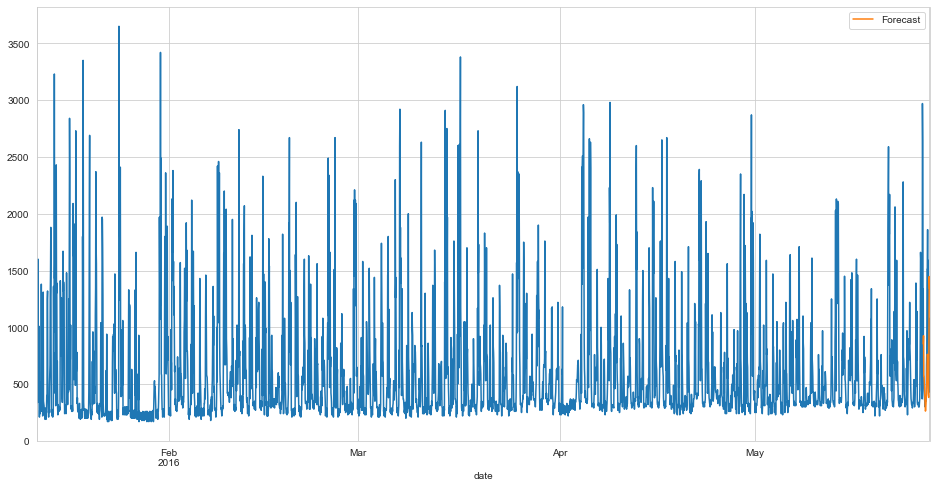

In [76]:
ax = df["Appliances"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

Yukaridaki grafigin son kismini focusladik. Prediction' lar yerine gercek degerleri kullanarak tahmin yaptirdigimizda tahminler cok da kötü cikmadi :

(406699.0, 406770.0)

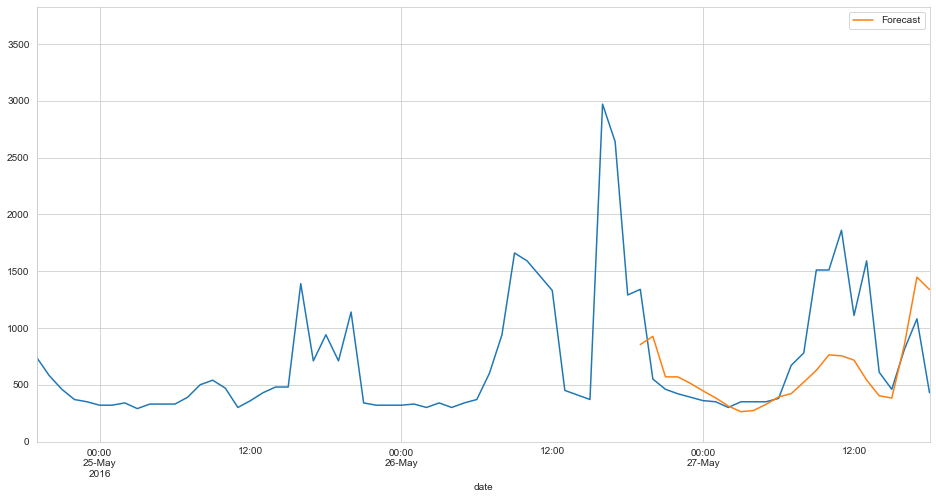

In [77]:
ax = df["Appliances"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2016-05-24 19:00:00', '2016-05-27 18:00:00')

### Second way : after each prediction, result will be use for next prediction

Gercek degerler ile degil de forecast sonucu cikan prediction' lar ile tahminlerimizi yapsaydik sonuc nasil olurdu, bunu gorecegiz.

__new.insert(0,current_pred) :__ first way' de reel degerleri vermistik, burda forecast sonucu aldigimiz predictionlar uzerine tahminlerimizi insa edecegiz.

In [78]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 24

first_eval_batch = full.values[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, full.shape[1]))
features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))

for i in range(periods):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)[0][0]
    
    # store prediction
    forecast.append(current_pred) 
    new = features[i][0].tolist()
    new.insert(0,current_pred)
    new = np.array(new).reshape(1,1,full.shape[1])
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis = 1)

1/1 [==============================] - 0s 21ms/step


In [79]:
eval_metrics(reel.reshape((1,-1))[0], forecast)

r2_score: -0.7704910130845029 
mae: 1.2552666841074824 
mse: 3.0684089978619373 
rmse: 1.751687471514807


In [80]:
forecast = target_transformer.inverse_transform(np.array(forecast).reshape(1,-1))
forecast

array([[ 8.5352478e+02,  7.6935052e+02,  6.6736145e+02,  6.9137250e+02,
         5.5592120e+02,  4.6173431e+02,  4.0787122e+02,  3.4310538e+02,
         2.9941327e+02,  2.8204718e+02,  3.1028186e+02,  3.7134341e+02,
         4.1189441e+02,  4.3995404e+02,  4.7470032e+02,  4.7311758e+02,
         3.8161682e+02,  2.7832739e+02,  8.2003754e+01, -4.9377289e+01,
         9.8193359e-01,  3.0685922e+02,  8.8519720e+02,  1.2506735e+03]],
      dtype=float32)

In [81]:
forecast_index = pd.date_range(start = '2016-05-26 19:00:00', periods = periods, freq = 'H')

In [82]:
forecast_df = pd.DataFrame(data = forecast.reshape(-1, 1), index = forecast_index, columns = ['Forecast'])

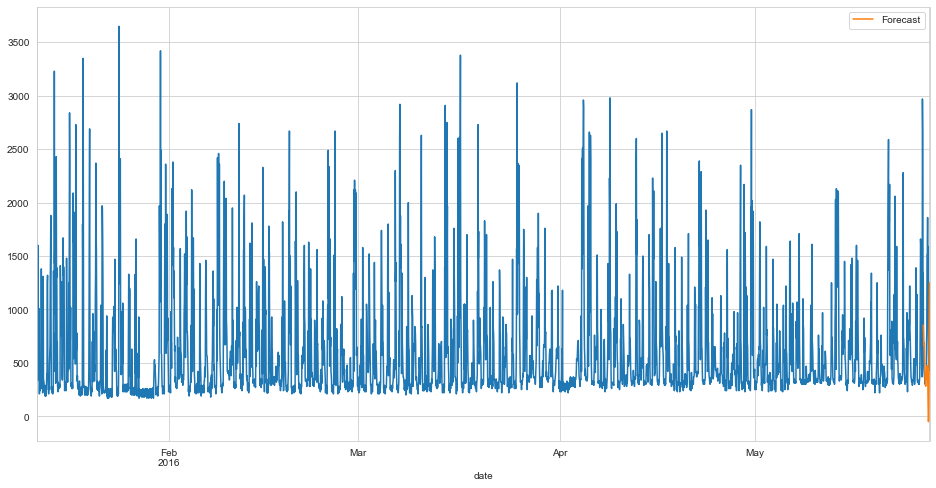

In [83]:
ax = df["Appliances"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

Prediction degerleri ile forecast islemi yaptigimizda da nispeten iyi bir sonuc elde ettik :

(406699.0, 406770.0)

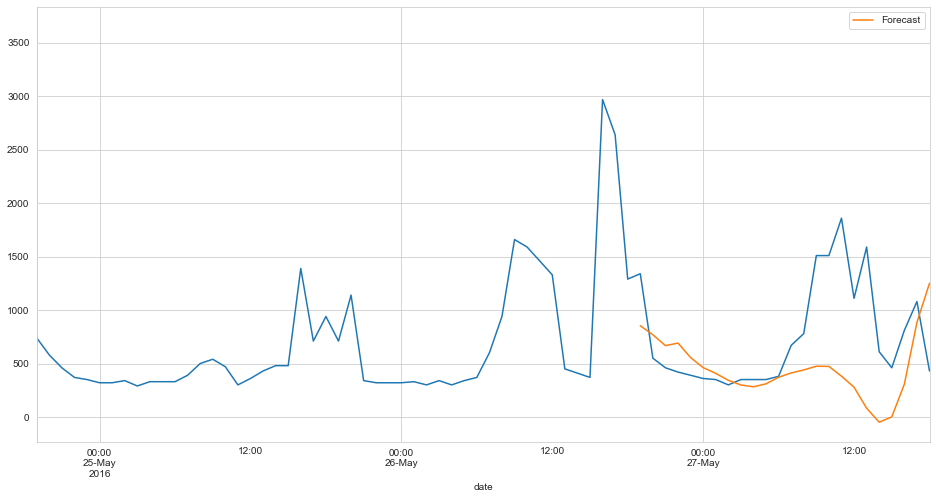

In [84]:
ax = df["Appliances"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2016-05-24 19:00:00', '2016-05-27 18:00:00')

Bu data setinde elimizdeki bagimzsiz feature' lar, bagimli feature' i aciklamada yeterli degil. Zamandan baska etken faktorler de var fakat bu bilgiler datasetimizde mevcut degil. Bu yüzden kurdugumuz modellerde cok iyi skorlar alamadik.